In [74]:
#Data source: http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
data = pd.read_csv('drug_data.csv')
data_len = len(data)
print(data_len)

1885


In [48]:
#testing data
# len(data['Gender'])
tmp = set()
for lol in data['Country']:
    tmp.add(lol)
print(tmp)

population = {}

for country in tmp:
    population[country] = sum(data["Country"][i] == country for i in range(data_len))
    print(country, population[country])

{'NZL', 'Other', 'IRL', 'AUS', 'GBR', 'USA', 'CAN'}
NZL 5
Other 118
IRL 20
AUS 54
GBR 1044
USA 557
CAN 87


In [176]:
# drug_names = ["Cannabis", "Coke", "Heroin", "Nicotine", "Alcohol"]
drug_names = ["Cannabis", "Coke", "Heroin", "Nicotine"]
country_names = ['NZL', 'IRL', 'AUS', 'GBR', 'USA', 'CAN', 'Other']
addict = ["CL5", "CL6"]
occational = ["CL3", "CL4"]
almost_never = ["CL0", "CL1", "CL2"]

def drug_counter(country, drug_name, addict_type):
    cnt = int(0)
    for person in range(data_len):
        if(country!=data["Country"][person]): continue
        f1 = 0
        f2 = 0
#         f3 = 0
        for drug in drug_names:
            if(data[drug][person] in addict_type):
                if(drug == drug_name):
                    f1 = 1
                else:
                    f2 = 1
#                 f3 = f3 + 1
#         if(drug_name == "MM"):
#             if(f3>1):
#                 cnt = cnt + 1
#         else:
        if(f1 == 1):
                cnt = cnt + 1
    return cnt

In [45]:
N = np.arange(len(country_names))
print(N)

[0 1 2 3 4 5 6]


In [177]:
Cannabis = [int(math.ceil(drug_counter(country, "Cannabis", addict)*100.0/population[country])) for country in country_names]
print("Cannabis", Cannabis)

Coke = [int(math.ceil(drug_counter(country, "Coke", addict)*100.0/population[country])) for country in country_names]
print("Coke", Coke)

Heroin = [int(math.ceil(drug_counter(country, "Heroin", addict)*100.0/population[country])) for country in country_names]
print("Heroin", Heroin)

Nicotine = [int(math.ceil(drug_counter(country, "Nicotine", addict)*100.0/population[country])) for country in country_names]
print("Nicotine", Nicotine)

# Alcohol = [int(math.ceil(drug_counter(country, "Alcohol", addict)*100.0/population[country])) for country in country_names]
# print("Alcohol", Alcohol)

# MM = [int(math.ceil(drug_counter(country, "MM", addict)*100.0/population[country])) for country in country_names]
# print("MM", MM)

Cannabis [40, 50, 47, 16, 63, 41, 53]
Coke [0, 5, 0, 3, 5, 11, 3]
Heroin [0, 0, 0, 1, 4, 6, 1]
Nicotine [20, 75, 49, 32, 53, 51, 54]


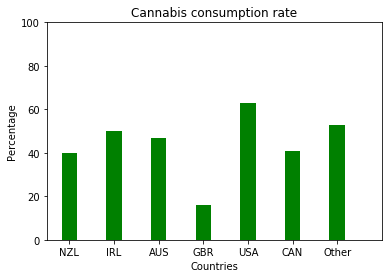

In [178]:
width = 0.35
axes = plt.gca()
axes.set_xlim([-0.5, 7])
axes.set_ylim([0, 100])
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Cannabis consumption rate')
Cannabis_column = plt.bar(N, Cannabis, width, color = 'green')
plt.xticks(N, country_names)
# plt.legend()
plt.show()
plt.close()

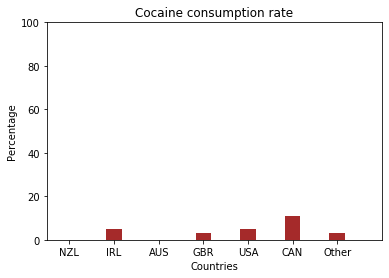

In [179]:
width = 0.35
axes = plt.gca()
axes.set_xlim([-0.5, 7])
axes.set_ylim([0, 100])
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Cocaine consumption rate')
Coke_column = plt.bar(N, Coke, width, color = 'brown')
plt.xticks(N, country_names)
# plt.legend()
plt.show()
plt.close()

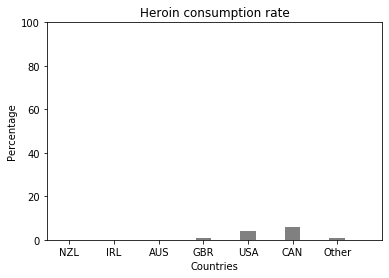

In [180]:
width = 0.35
axes = plt.gca()
axes.set_xlim([-0.5, 7])
axes.set_ylim([0, 100])
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Heroin consumption rate')
Heroin_column = plt.bar(N, Heroin, width, color = 'grey')
plt.xticks(N, country_names)
# plt.legend()
plt.show()
plt.close()

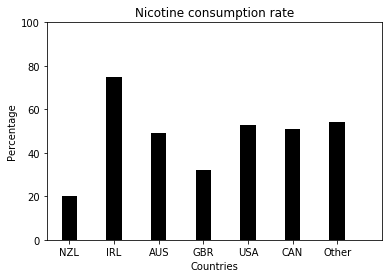

In [181]:
width = 0.35
axes = plt.gca()
axes.set_xlim([-0.5, 7])
axes.set_ylim([0, 100])
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.title('Nicotine consumption rate')
Nicotine_column = plt.bar(N, Nicotine, width, color = 'black')
plt.xticks(N, country_names)
# plt.legend()
plt.show()
plt.close()

In [175]:
# width = 0.35
# axes = plt.gca()
# axes.set_xlim([-0.5, 7])
# axes.set_ylim([0, 100])
# plt.ylabel('Percentage')
# plt.xlabel('Countries')
# plt.title('Alcohol consumption rate')
# Alcohol_column = plt.bar(N, Alcohol, width, color = 'yellow')
# plt.xticks(N, country_names)
# # plt.legend()
# plt.show()

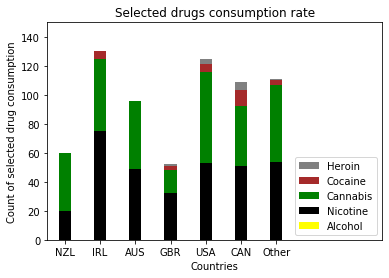

In [189]:
plt.close()
axes = plt.gca()
axes.set_xlim([-0.5, 9])
axes.set_ylim([0, 150])

width = 0.35
plt.ylabel('Count of selected drug consumption')
plt.xlabel('Countries')
plt.title('Selected drugs consumption rate')

# Alcohol_column = plt.bar(N, Alcohol, width, color = 'yellow')
# base = Alcohol

# Nicotine_column = plt.bar(N, Nicotine, width, bottom = base, color = 'black')
# base = np.add(base, Nicotine)

Nicotine_column = plt.bar(N, Nicotine, width, color = 'black')
base = Nicotine

Cannabis_column = plt.bar(N, Cannabis, width, bottom = base, color = 'green')
base = np.add(base, Cannabis)

Coke_column = plt.bar(N, Coke, width, bottom = base, color = 'brown')
base = np.add(base, Coke)

Heroin_column = plt.bar(N, Heroin, width, bottom = base, color = 'grey')
base = np.add(base, Heroin)

plt.xticks(N, country_names)
plt.legend([Heroin_column, Coke_column, Cannabis_column, Nicotine_column, Alcohol_column], ["Heroin", "Cocaine", "Cannabis", "Nicotine", "Alcohol"], loc="lower right")
plt.show()
plt.close()

In [185]:
Educated= ["Professional certificate/ diploma", "University degree", "Masters degree", "Doctorate degree"]

def addict_counter(country, addict_type):
    cnt = int(0)
    for _ in range(data_len):
        if(data["Country"][_] == country):
            f = 0
            for drug in drug_names:
                if(data[drug][_] in addict_type):
                    f = 1
                    break
            if(f):
                cnt = cnt + 1
    return int(math.ceil(cnt * 100 / population[country]))


def educated_counter(country):
    cnt = int(0)
    for _ in range(data_len):
        if(data["Country"][_] == country and data["Education"][_] in Educated):
            cnt = cnt + 1
    return int(math.ceil(cnt * 100 / population[country]))

def not_educated_counter(country):
    cnt = int(0)
    for _ in range(data_len):
        if(data["Country"][_] == country and data["Education"][_] not in Educated):
            cnt = cnt + 1
    return int(math.ceil(cnt * 100 / population[country]))

In [188]:
educated_cnt = [educated_counter(x) for x in country_names]
not_educated_cnt = [not_educated_counter(x) for x in country_names]
addict_cnt = [addict_counter(x, addict) for x in country_names]

print(addict_cnt)
print(educated_cnt)
print(not_educated_cnt)

[40, 80, 67, 37, 79, 66, 68]
[60, 40, 58, 75, 37, 53, 46]
[40, 60, 43, 26, 64, 48, 55]


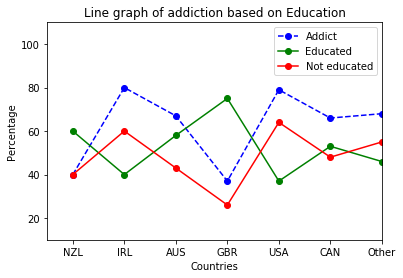

In [204]:
axes = plt.gca()
axes.set_xlim([-0.5, 6])
axes.set_ylim([10, 110])
plt.plot(country_names, addict_cnt, label = 'Addict', linestyle='--', marker = 'o', color = 'blue')
plt.plot(country_names, educated_cnt, label = 'Educated', marker = 'o', color = 'green')
plt.plot(country_names, not_educated_cnt, label = 'Not educated', marker = 'o', color = 'red')
plt.xlabel('Countries')
plt.ylabel('Percentage')
plt.title('Line graph of addiction based on Education')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [227]:
def isAddict(person_id):
    for drug in drug_names:
        if(data[drug][person_id] in addict):
            return 1
    return 0

def probability_of_getting_addicted(kw, d_len = data_len): #kwargs is a map with keys as Age, Gender, Education, Country where values are specified exactly as dataset
    keys = list()
    for key in kw.keys():
        keys.append(key)
    tot = 0
    addict = 0
    for person in range(data_len):
        f = 1
        for tp in keys:
            if(data[tp][person] != kw[tp]):
                f = 0
                break
        if(f):
            tot = tot + 1
            if(isAddict(person)):
                addict = addict + 1
    tot = max(tot, 1)
    return addict*100.00/tot

lol = dict()
lol["Age"] = "25-34"
lol["Gender"] = "Male"
lol["Education"] = "Doctorate degree"
lol["Country"] = "GBR"

print(probability_of_getting_addicted(lol)) # data of second person in dataset

25.0


In [241]:
data = data.sample(frac=1).reset_index(drop=True)
print(data)

        ID    Age  Gender                                          Education  \
0     1612  25-34  Female                                  University degree   
1       28  35-44    Male                                  University degree   
2      285  35-44    Male                  Professional certificate/ diploma   
3      944  18-24  Female  Some college or university, no certificate or ...   
4      115  35-44    Male  Some college or university, no certificate or ...   
5     1623  35-44    Male                                  University degree   
6     1577  35-44  Female  Some college or university, no certificate or ...   
7     1119  18-24    Male  Some college or university, no certificate or ...   
8      182  25-34    Male                                   Doctorate degree   
9     1397  25-34  Female                                     Masters degree   
10    1564  35-44    Male                  Professional certificate/ diploma   
11     341  45-54  Female               

In [257]:
train_data = int(data_len*.90)
test_data = data_len - train_data

print("Train data:", train_data, "\nTest data:", test_data)

correct_res = 0

for person in range(train_data, data_len):
    lol = dict()
    lol["Age"] = data["Age"][person]
    lol["Gender"] = data["Gender"][person]
    lol["Education"] = data["Education"][person]
    lol["Country"] = data["Country"][person]
    
    if(isAddict(person) and probability_of_getting_addicted(lol, d_len = train_data)>50):
        correct_res = correct_res + 1
    elif(not isAddict(person) and probability_of_getting_addicted(lol, d_len = train_data)<=50):
        correct_res = correct_res + 1

print(">> Accuracy:", correct_res*100/test_data)

Train data: 1696 
Test data: 189
>> Accuracy: 80.95238095238095
